In [1]:
### Notebook to analyse semantic change around ethnic, religious, and caste categories in the selected GM
### ESSHC 2025

### Author: jiaqi.zhu@dh.huc.knaw.nl 

In [ ]:
### I use code from Barbara McGillivray in this notebook. 
### link: https://github.com/BarbaraMcG/darwin-semantic-change/blob/main/Semantic_change_Darwin_BMcG_Aug2024.ipynb

### I. Reading the selected GM

In [1]:
# on cleaned letters, not full letters because they are not as cleaned as the selected ones
import spacy
import pandas as pd

df = pd.read_csv('/Users/zhujiaqi/trifecta/all_letters.tsv',sep='\t')

In [2]:
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610.0,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610.0,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610.0,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611.0,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612.0,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765.0,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766.0,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766.0,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766.0,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN


In [3]:
import numpy as np
# Drop rows with NaN or infinite values in the float column and convert to integer
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['year'])
df['year'] = df['year'].astype(int)

In [4]:
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN


Number of letters per year

In [5]:
df0 = df.groupby(['year']).count()
df0 = df0['title']
df0

year
1610    3
1611    1
1612    8
1614    9
1615    2
       ..
1763    3
1764    3
1765    3
1766    3
1767    1
Name: title, Length: 155, dtype: int64

Visualize number of letters per year with a bar plot:

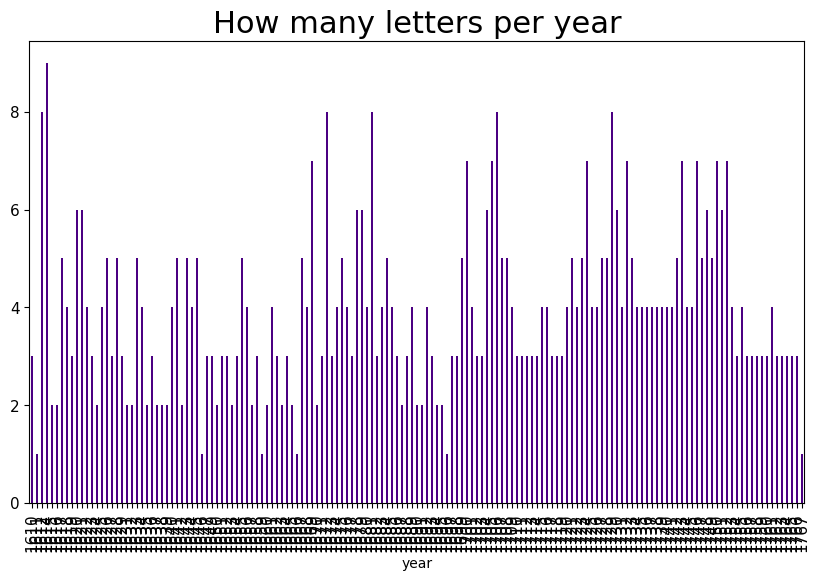

In [6]:
import matplotlib.pyplot as plt

ax = df0.plot(kind='bar', figsize=(20,6), color="indigo", fontsize=11);
#ax.set_alpha(0.5)
ax.set_title("How many letters per year", fontsize=22)
plt.show()

we can check if the letters contains our interested word, e.g., moor:

In [7]:
import re

pd.set_option('display.max_colwidth', 60)
word_of_interest = "moor"

def extract_context(text, word, window=30):
    pattern = re.compile(rf".{{0,{window}}}{word}.{{0,{window}}}", re.IGNORECASE)
    match = pattern.search(text)
    return match.group(0) if match else ''

filtered_df = df[df['text'].str.contains(word_of_interest, case=False, na=False)]
filtered_df['Context'] = filtered_df['text'].apply(lambda x: extract_context(x, word_of_interest))
# Temporarily set options to display all rows and columns
pd.set_option('display.max_rows', None)  # None means no limit

print(filtered_df[['year', 'Context']].sort_values(by='year'))

# Reset options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

     year                                                      Context
3    1611  rs koy, die sij sochten te vermoorden, roepende altemael...
5    1612  en was gevallen. bij nacht vermoort ende buyten ’t recif...
14   1614  tandt (soo zij seyden) van ’t Moorse gelooff. Waerinne i...
35   1618           nde meest met al het volck vermoort sijn geworden.
48   1621   mede geen deech, want als de Mooren bemercken, dat men ...
55   1623   attentaten deser trouweloose Mooren voor te comen, is m...
58   1624  ons advyseert, werden alle in Moorenlanden geconsumeert,...
60   1625   hoe d’Engelsen aldaer met de Mooren weder in nieuwe moe...
63   1625   gevalle den plicht van sijne Moorsche wedt mede soude n...
68   1626  . ende alle dien trouweloosen Moorsen aenhangh dient t’e...
66   1626  inueerdt, gelijck mede dat de Mooren van Masilipatnam oo...
64   1626  n ende daermede voorts met de Moorsche schepen naer de C...
70   1627  ch een jongen verradelijck vermoort ende acht deerlijck ...
79   1

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_90207/3456413172.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Context'] = filtered_df['text'].apply(lambda x: extract_context(x, word_of_interest))


In [8]:
filtered_df[['year', 'Context']].groupby('year').size().reset_index(name='count_of_texts')

,year,count_of_texts
0,1611,1
1,1612,1
2,1614,1
3,1618,1
4,1621,1
...,...,...
141,1763,3
142,1764,2
143,1765,2
144,1766,2


### II. Linguistic pre-processing

In [9]:
# I import (modern) dutch dictionary from spacy
# is there any better way to do this since what we have is old dutch?
sp = spacy.load("nl_core_news_sm")

I split the letters into sentences, although this step may not be needed in the end. 

In [10]:
df['text'] = df['text'].astype(str)

df['text_spacy'] = [sp(df['text'].iloc[i]) for i in range(df.shape[0])]
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN,"(Ook, hebben, wij, bij, secreet, besluyt, van,..."


I lemmatise the letters. 

In [12]:
df['Lemmas'] = [[word.lemma_ for word in sp(df['text'].iloc[i])] for i in range(df.shape[0])]
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Tokens,Lemmas
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, "", reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckig, uitslag, de, in, 1762, onder..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN,"(Ook, hebben, wij, bij, secreet, besluyt, van,...","[Ook, hebben, wij, bij, secreet, besluyt, van,...","[ook, hebben, wij, bij, secreet, besluyt, van,..."


Stopwords exclusion and further filtering. 
I exclude non-alphabetical characters:

In [14]:
df["Lemmas_clean"] = ''
for i in range(df.shape[0]):
    df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
df

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_90207/610486668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_90207/610486668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_90207/610486668.py:3: SettingWithCopy

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Tokens,Lemmas,Lemmas_nostop,Lemmas_clean
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u...","[«, scheepshericht, ,, vnl., handelen, uitgede...","[«, scheepshericht, vnl., handelen, over, uitg..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi...","[«, inhoud, brief, evenmin, beide, vorig, alge...","[«, de, inhoud, van, deze, brief, zijn, evenmi..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t...","[., ., ., principaelijck, besich, ’t, opbouwen...","[principaelijck, besich, zijn, in, ’t, opbouwe..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ...","[advys, soud, Oock, ,, U, E, licht, vrouw, vad...","[mijn, advys, soud, Oock, sijn, dat, U, E, gee..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ...","[vermits, gouverneur, Fockens, apart, brief, v...","[dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a...","[nadat, twee, gezandschap, Colombo, aankomen, ...","[nadat, het, twee, gezandschap, op, Colombo, a..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckigen, uitslag, der, in, 1762,

I exclude stop words, although they will be needed for word embedding training:

In [15]:
from nltk.corpus import stopwords
import nltk

#I manually added these stopwords from what i have seen from the VOC data. 
# I had a discussion with Esger a few months ago to know how they deal with the stopwoprds in old Dutch in Republic project and he said it seems to him a gopod solution 
old_stoplist = ['„','den','wij','t','ende','—','ten','wel','uijt','soo','de','van','en','in',
                                        'ten','uyt','ƒ','maer','daer','f',
            'dese', 'des','den', 'ter', 'aen', 'soude',
            'sullen', 'sal', 'haer', 'sij', 'hadde',
            'desen','ofte','se','sijn', 'onse',
            'sonder', 'soo', 'eenige', 'sijne',
            'oock', 'alsoo', 'naer', 'weder',
            'seer', 'ende', 'mede', 'dog', 'dogh',
            'konnen', 'off', 'connen', 'buyten',
            'daarvan', 'souden', 'nae', 'wesen',
            'waarvan', 'aldaer', 'tegens', 'dien','vande','alhier','welke','aldaar','alle','aande','deselve','noch',
               'lb', 'zullen', 'moeten', 'enen', 'd', 'ander','hadden', 'sijnde','zijnde', 'hebbende', 'daarmet', 'alleen'] 

stopwords = set(stopwords.words('dutch')+old_stoplist)
df["Lemmas_nostop"] = ''
for i in range(df.shape[0]):
    df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
df

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_90207/1999558015.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_90207/1999558015.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_90207/1999558015.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Tokens,Lemmas,Lemmas_nostop,Lemmas_clean
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u...","[«, scheepshericht, ,, vnl., handelen, uitgede...","[«, scheepshericht, vnl., handelen, over, uitg..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi...","[«, inhoud, brief, evenmin, beide, vorig, alge...","[«, de, inhoud, van, deze, brief, zijn, evenmi..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t...","[., ., ., principaelijck, besich, ’t, opbouwen...","[principaelijck, besich, zijn, in, ’t, opbouwe..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ...","[advys, soud, Oock, ,, U, E, licht, vrouw, vad...","[mijn, advys, soud, Oock, sijn, dat, U, E, gee..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ...","[vermits, gouverneur, Fockens, apart, brief, v...","[dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a...","[nadat, twee, gezandschap, Colombo, aankomen, ...","[nadat, het, twee, gezandschap, op, Colombo, a..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckigen, uitslag, der, in, 1762,

### III. Training word embeddings
Function for printing the vocabulary of a model

In [16]:
def print_vocab(model, top_n = None):
  count = 0
  if top_n is not None:
    for index, word in enumerate(model.wv.index_to_key):
      count+= 1
      if count < top_n:
        print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")
  else:
    for index, word in enumerate(model.wv.index_to_key):
      print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

In [17]:
print(df['Lemmas_clean'].head())

0    [«, scheepshericht, vnl., handelen, over, uitg...
1        [«, „, Journaelsgewijse, reisbeschrijving, »]
2    [«, de, inhoud, van, deze, brief, zijn, evenmi...
3    [principaelijck, besich, zijn, in, ’t, opbouwe...
4    [mijn, advys, soud, Oock, sijn, dat, U, E, gee...
Name: Lemmas_clean, dtype: object


I train Word2Vec embeddings from the letters. 

min_count: the minimum frequency threshold allowed for a word to be included

vector_size: the number of dimensions in which we wish to represent our word. This is the size of the word embedding; typically between 100 and 1,000.

window: The size of the context window determines how many words before and after a given word would be included as context words of the given word. Typically between 5 and 10.

sg: – Training algorithm: 1 for skip-gram; otherwise CBOW.

In [18]:
import time
import gensim

start = time.time()
cbow_w5_f1_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=300, window = 5, sg = 0)
end = time.time()
print("It has taken", round(end - start), "seconds")
start = time.time()
cbow_w5_f1_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 0)
end = time.time()
print("It has taken", round(end - start), "seconds")

It has taken 17 seconds
It has taken 36 seconds


In [19]:
print_vocab(cbow_w5_f1_300, 10)

word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op


In [20]:
# Check the vocabulary
vocabulary = list(cbow_w5_f1_300.wv.index_to_key)
print(vocabulary[:20])  # Display the first 20 words in the vocabulary

['de', 'van', 'en', 'te', 'zijn', 'in', 'het', '\n', 'op', 'een', 'hebben', 'dat', 'met', 'den', 'die', 'worden', 'voor', 'niet', 'aan', 'tot']


Different parameters. 

In [21]:
#300 dimensions:
start = time.time()
cbow_w5_f0_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=300, window = 5, sg = 0)
end = time.time()
print("cbow_w5_f0_300 has taken", round(end - start), "seconds")
start = time.time()
sg_w5_f1_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=300, window = 5, sg = 1)
end = time.time()
print("sg_w5_f1_300 has taken", round(end - start), "seconds")
start = time.time()
sg_w5_f0_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=300, window = 5, sg = 1)
end = time.time()
print("sg_w5_f0_300 has taken", round(end - start), "seconds")
start = time.time()
cbow_w10_f1_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=300, window = 10, sg = 0)
end = time.time()
print("cbow_w10_f1_300 has taken", round(end - start), "seconds")
start = time.time()
cbow_w10_f0_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=300, window = 10, sg = 0)
end = time.time()
print("cbow_w10_f0_300 has taken", round(end - start), "seconds")
start = time.time()
sg_w10_f1_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=300, window = 10, sg = 1)
end = time.time()
print("sg_w10_f1_300 has taken", round(end - start), "seconds")
start = time.time()
sg_w10_f0_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=300, window = 10, sg = 1)
end = time.time()
print("sg_w10_f0_300 has taken", round(end - start), "seconds")
#1000 dimensions:
start = time.time()
cbow_w5_f0_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=1000, window = 5, sg = 0)
end = time.time()
print("cbow_w5_f0_1000 has taken", round(end - start), "seconds")
start = time.time()
sg_w5_f1_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
end = time.time()
print("sg_w5_f1_1000 has taken", round(end - start), "seconds")
start = time.time()
sg_w5_f0_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=1000, window = 5, sg = 1)
end = time.time()
print("sg_w5_f0_1000 has taken", round(end - start), "seconds")
start = time.time()
cbow_w10_f1_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=1000, window = 10, sg = 0)
end = time.time()
print("cbow_w10_f1_1000 has taken", round(end - start), "seconds")
start = time.time()
cbow_w10_f0_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=1000, window = 10, sg = 0)
end = time.time()
print("cbow_w10_f0_1000 has taken", round(end - start), "seconds")
start = time.time()
sg_w10_f1_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=1000, window = 10, sg = 1)
end = time.time()
print("sg_w10_f1_1000 has taken", round(end - start), "seconds")
start = time.time()
sg_w10_f0_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=1000, window = 10, sg = 1)
end = time.time()
print("sg_w10_f0_1000 has taken", round(end - start), "seconds")

cbow_w5_f0_300 has taken 17 seconds
sg_w5_f1_300 has taken 60 seconds
sg_w5_f0_300 has taken 58 seconds
cbow_w10_f1_300 has taken 21 seconds
cbow_w10_f0_300 has taken 20 seconds
sg_w10_f1_300 has taken 102 seconds
sg_w10_f0_300 has taken 101 seconds
cbow_w5_f0_1000 has taken 35 seconds
sg_w5_f1_1000 has taken 120 seconds
sg_w5_f0_1000 has taken 118 seconds
cbow_w10_f1_1000 has taken 46 seconds
cbow_w10_f0_1000 has taken 40 seconds
sg_w10_f1_1000 has taken 212 seconds
sg_w10_f0_1000 has taken 213 seconds


Skip-gram is more computationally expensive, especially with larger window sizes.

Let's save the models so we can use them later. You can skip this cell.

In [22]:
import os

models_folder = '/Users/zhujiaqi/trifecta'
models = [cbow_w5_f1_300, cbow_w5_f1_1000, cbow_w5_f0_300, cbow_w5_f0_1000, sg_w5_f1_300, sg_w5_f1_1000, sg_w5_f0_300, sg_w5_f0_1000, cbow_w10_f1_300, cbow_w10_f1_1000, cbow_w10_f0_300, cbow_w10_f0_1000, sg_w10_f1_300, sg_w10_f1_1000, sg_w10_f0_300, sg_w10_f0_1000]
models_names = ['cbow_w5_f1_300', 'cbow_w5_f1_1000', 'cbow_w5_f0_300', 'cbow_w5_f0_1000', 'sg_w5_f1_300', 'sg_w5_f1_1000', 'sg_w5_f0_300', 'sg_w5_f0_1000', 'cbow_w10_f1_300', 'cbow_w10_f1_1000', 'cbow_w10_f0_300', 'cbow_w10_f0_1000', 'sg_w10_f1_300', 'sg_w10_f1_1000', 'sg_w10_f0_300', 'sg_w10_f0_1000']
for i in range(len(models)):
  print("Saving model number", i+1)
  models[i].save(os.path.join(models_folder, models_names[i]))

Saving model number 1
Saving model number 2
Saving model number 3
Saving model number 4
Saving model number 5
Saving model number 6
Saving model number 7
Saving model number 8
Saving model number 9
Saving model number 10
Saving model number 11
Saving model number 12
Saving model number 13
Saving model number 14
Saving model number 15
Saving model number 16


Print the first ten words of the vocabulary of each model

In [23]:
for i in range(len(models)):
  print(models_names[i])
  print_vocab(models[i], 10)

cbow_w5_f1_300
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op
cbow_w5_f1_1000
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op
cbow_w5_f0_300
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op
cbow_w5_f0_1000
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op
sg_w5_f1_300
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #

Let's look at the most similar words (i.e. neighbours) of words of interest:

In [23]:
#moor
for i in range(len(models)):
  print(models_names[i], models[i].wv.similar_by_word('moor', 10))

cbow_w5_f1_300 [('gevlugte', 0.9436090588569641), ('Maleyer', 0.921453595161438), ('jaghat', 0.9193357229232788), ('Fransch', 0.9190799593925476), ('Gaffoer', 0.9178575873374939), ('dorpeling', 0.9168499112129211), ('rebellig', 0.9120494723320007), ('Siamse', 0.9103559255599976), ('oproerig', 0.9099822044372559), ('Bouginesen', 0.9096480011940002)]
cbow_w5_f1_1000 [('gevlugte', 0.946222186088562), ('Maleyer', 0.9357782006263733), ('oproerig', 0.9326433539390564), ('woonende', 0.9280766844749451), ('Ragias', 0.927422285079956), ('Bouginesen', 0.9265326857566833), ('Johoors', 0.9232696890830994), ('Bouginees', 0.9207707643508911), ('Maccassaren', 0.9190661907196045), ('Dauw', 0.9189724326133728)]
cbow_w5_f0_300 [('Maleyer', 0.9357158541679382), ('Intje', 0.9333342909812927), ('gevlugte', 0.9296022653579712), ('Gaffoer', 0.9285082817077637), ('ouder', 0.9233448505401611), ('ponglous', 0.9212462902069092), ('Jerenica', 0.9187803864479065), ('croon', 0.9166301488876343), ('boven-', 0.913803

In [24]:
#mahratten
for i in range(len(models)):
  print(models_names[i], models[i].wv.similar_by_word('mahratten', 10))

cbow_w5_f1_300 [('Malpapoy', 0.7643158435821533), ('curcumalevering', 0.7549646496772766), ('kindermoord', 0.750360906124115), ('sesse', 0.7381504774093628), ('lxk', 0.7356598377227783), ('bemiddelingh', 0.7296069264411926), ('onvolledig', 0.7293548583984375), ('dwarshek', 0.7244592905044556), ('ondiept', 0.7244241833686829), ('zwerven', 0.7238724231719971)]
cbow_w5_f1_1000 [('medegereeken', 0.8277120590209961), ('ïntercederen', 0.8081738352775574), ('overgeseth', 0.7987124919891357), ('weederzijden', 0.7973631024360657), ('retorsie', 0.7855355143547058), ('beloofft', 0.7846187949180603), ('Coedi', 0.7844136953353882), ('Oelesivas', 0.7841339111328125), ('Kotas', 0.7789723873138428), ('viantschap', 0.7685827016830444)]
cbow_w5_f0_300 [('Afghanistan', 0.8189992308616638), ('volgeloap', 0.8142275810241699), ('groeten', 0.8048628568649292), ('Peraz', 0.784328281879425), ('relieff', 0.783427894115448), ('Tansjaur', 0.7789122462272644), ('Deccaly', 0.7783682346343994), ('zwerven', 0.7750381

In [26]:
#mogol
for i in range(len(models)):
  print(models_names[i], models[i].wv.similar_by_word('mogol', 10))

cbow_w5_f1_300 [('goegoegoe', 0.8662102222442627), ('Pacoeboeana', 0.8593733906745911), ('regenen', 0.8575247526168823), ('ratoe', 0.8567895293235779), ('vermaeren', 0.8549604415893555), ('factie', 0.8540929555892944), ('Sopingh', 0.8521384000778198), ('Calamatta', 0.8520202040672302), ('Lij', 0.8504050374031067), ('paljetter', 0.849283754825592)]
cbow_w5_f1_1000 [('zone', 0.9078571796417236), ('senghad', 0.9014386534690857), ('Trevancoor', 0.8987873792648315), ('Atingen', 0.8955357670783997), ('Soerapatti', 0.8949644565582275), ('Aboe', 0.8902398347854614), ('aart', 0.8861253261566162), ('regenen', 0.8835340142250061), ('Tansjouwer', 0.8822755217552185), ('tommagong', 0.8780961632728577)]
cbow_w5_f0_300 [('soone', 0.9068825244903564), ('outsten', 0.9033071398735046), ('berugt', 0.8845195770263672), ('schoonvader', 0.8834668397903442), ('oudste', 0.882131040096283), ('goegoegoe', 0.8814605474472046), ('schoonsoon', 0.880947470664978), ('veldtogt', 0.8802622556686401), ('nef', 0.8789756

In [2]:
#mardijker
# this one has rather stable meaning, so Manjusha suggested me to have it compared to those have more than one meaning
for i in range(len(models)):
  print(models_names[i], models[i].wv.similar_by_word('mardijker', 10))

NameError: name 'models' is not defined

### model choice

In order to do a systematic evaluation and choose the best model for our purposes, we would need to test them all against some "gold standard", e.g. a list of known synonyms for this corpus. We need domain knowledge from the VOC history and 17th.18th Dutch for this step.

In [24]:
# currently I am using the following words just to see if things work, but I would likle to discuss with Manjusha to have "better" words for this task
# which word2vec model will be chosen depends on what  pairs of synonyms as the "gold standard" are selected here
# i found thes highly similar words (similarity scores over 8.8 of 10) from: https://github.com/lizzybrans/Simlex999-Dutch/blob/main/SimLex-999-Dutch-final.txt
# in this paper, they developed a Dutch variant of the SimLex-999 word similarity dataset by gathering similarity judgements from 235 native Dutch speakers.
synonyms = dict({"eenvoudig": "gemakkelijk", "angstig": "bang", "boosheid": "woede", "vlug": "snel"})
synonyms

{'eenvoudig': 'gemakkelijk',
 'angstig': 'bang',
 'boosheid': 'woede',
 'vlug': 'snel'}

Check that the synonym pairs are preserved by the models:

In [25]:
from statistics import mean

models_synonymity_average = dict()
for i in range(len(models)):
  print("Model", models_names[i])
  average_synonimity = 0
  synonymities = list()
  for s1 in synonyms:
    print("\tSimilarity between", s1, "and", synonyms[s1],  "in", models_names[i], models[i].wv.similarity(s1, synonyms[s1]))
    synonymities.append(models[i].wv.similarity(s1, synonyms[s1]))
  average_synonimity = mean(synonymities)
  print(average_synonimity)
  models_synonymity_average[models_names[i]] = average_synonimity
models_synonymity_average

Model cbow_w5_f1_300
	Similarity between eenvoudig and gemakkelijk in cbow_w5_f1_300 0.65651405
	Similarity between angstig and bang in cbow_w5_f1_300 0.38696796
	Similarity between boosheid and woede in cbow_w5_f1_300 0.39994493
	Similarity between vlug and snel in cbow_w5_f1_300 0.5923623
0.5089473
Model cbow_w5_f1_1000
	Similarity between eenvoudig and gemakkelijk in cbow_w5_f1_1000 0.7272669
	Similarity between angstig and bang in cbow_w5_f1_1000 0.35783744
	Similarity between boosheid and woede in cbow_w5_f1_1000 0.5592793
	Similarity between vlug and snel in cbow_w5_f1_1000 0.53472334
0.54477674
Model cbow_w5_f0_300
	Similarity between eenvoudig and gemakkelijk in cbow_w5_f0_300 0.76019865
	Similarity between angstig and bang in cbow_w5_f0_300 0.25466445
	Similarity between boosheid and woede in cbow_w5_f0_300 0.5036564
	Similarity between vlug and snel in cbow_w5_f0_300 0.34311163
0.4654078
Model cbow_w5_f0_1000
	Similarity between eenvoudig and gemakkelijk in cbow_w5_f0_1000 0.

{'cbow_w5_f1_300': 0.5089473,
 'cbow_w5_f1_1000': 0.54477674,
 'cbow_w5_f0_300': 0.4654078,
 'cbow_w5_f0_1000': 0.5149438,
 'sg_w5_f1_300': 0.820094,
 'sg_w5_f1_1000': 0.8047564,
 'sg_w5_f0_300': 0.818349,
 'sg_w5_f0_1000': 0.8170222,
 'cbow_w10_f1_300': 0.45156834,
 'cbow_w10_f1_1000': 0.3839699,
 'cbow_w10_f0_300': 0.42660558,
 'cbow_w10_f0_1000': 0.5742185,
 'sg_w10_f1_300': 0.80586267,
 'sg_w10_f1_1000': 0.79277813,
 'sg_w10_f0_300': 0.79467064,
 'sg_w10_f0_1000': 0.81538177}

I choose the model that maximises the average similarity between synonyms:

In [26]:
model_chosen_name = max(models_synonymity_average, key=models_synonymity_average.get)
for i in range(len(models)):
  if models_names[i] == model_chosen_name:
    models[i].save(os.path.join(models_folder, "Chosen_model"))
model_chosen_name

'sg_w5_f1_300'

## IV. Semantic change with cosine similarity

### Step 1: Define ten time periods and split the corpus

In [27]:
# currently i split the data into two, 17th century data and 18th century data
# we can split it into more slices or split it more sophisticatedly (based on major events), we will try later
date = 1700
time_period_1 = list(range(min(df['year']),date+1))
time_period_2 = list(range(date+1,max(df['year'])+1))
print(time_period_1, time_period_2)

[1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700] [1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767]


In [28]:
(df['year']).describe()

count     604.000000
mean     1692.763245
std        45.155804
min      1610.000000
25%      1655.000000
50%      1699.000000
75%      1732.000000
max      1767.000000
Name: year, dtype: float64

In [29]:
df1 = df[df['year'].isin(time_period_1)]
df2 = df[df['year'].isin(time_period_2)]

In [30]:
max(df1['year'])

1700

In [31]:
df.shape[0] == df1.shape[0] + df2.shape[0]

True

### Step 2. Train word embeddings for the two time periods

I train two word2vec models, one for each dataframe corresponding to a time period. I choose the parameters that led to the best model. This takes approximately 5 minutes. You can skip this cell.

In [32]:
model1 = gensim.models.Word2Vec(df1['Lemmas_clean'], min_count=1, vector_size=300, window = 5, sg = 1)
model2 = gensim.models.Word2Vec(df2['Lemmas_clean'], min_count=1, vector_size=300, window = 5, sg = 1)

What are the vocabularies of these models?

In [33]:
print_vocab(model1, 10)

word #0/119486 is de
word #1/119486 is van
word #2/119486 is te
word #3/119486 is en
word #4/119486 is zijn
word #5/119486 is in
word #6/119486 is 

word #7/119486 is met
word #8/119486 is den


In [34]:
print_vocab(model2, 10)

word #0/153109 is de
word #1/153109 is van
word #2/153109 is en
word #3/153109 is zijn
word #4/153109 is te
word #5/153109 is het
word #6/153109 is in
word #7/153109 is een
word #8/153109 is op


In [35]:
print(str(len(list(model1.wv.index_to_key))))
print(str(len(list(model2.wv.index_to_key))))

119486
153109


The intersection between the vocabularies of the two models:

In [36]:
vocab1 = set(list(model1.wv.index_to_key))
vocab2 = set(list(model2.wv.index_to_key))
len(vocab1.intersection(vocab2))

41818

### Step 3. Embedding space alignment

I will be using code from https://gist.github.com/zhicongchen/9e23d5c3f1e5b1293b16133485cd17d8, ported from HistWords https://github.com/williamleif/histwords.

First, I define a function to find the intersection between the vocabularies of two word2vec models:

In [37]:
def intersection_align_gensim(m1, m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1 & vocab_m2
    if words: common_vocab &= set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1 - common_vocab and not vocab_m2 - common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count") + m2.wv.get_vecattr(w, "count"), reverse=True)
    # print(len(common_vocab))

    # Then for each model...
    for m in [m1, m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.key_to_index[w] for w in common_vocab]
        old_arr = m.wv.vectors
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.vectors = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        new_key_to_index = {}
        new_index_to_key = []
        for new_index, key in enumerate(common_vocab):
            new_key_to_index[key] = new_index
            new_index_to_key.append(key)
        m.wv.key_to_index = new_key_to_index
        m.wv.index_to_key = new_index_to_key
        
        print(len(m.wv.key_to_index), len(m.wv.vectors))
        
    return (m1,m2)

Then, I define a function for aligning two spaces with Orthogonal Procrustes:

In [38]:
def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """
    Original script: https://gist.github.com/quadrismegistus/09a93e219a6ffc4f216fb85235535faf
    Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
        
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """

    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the (normalized) embedding matrices
    base_vecs = in_base_embed.wv.get_normed_vectors()
    other_vecs = in_other_embed.wv.get_normed_vectors()

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one, i.e. multiplying the embedding matrix by "ortho"
    other_embed.wv.vectors = (other_embed.wv.vectors).dot(ortho)    
    
    return other_embed

Now I can apply the function to my models:

In [39]:
smart_procrustes_align_gensim(model1, model2, words=None)

41818 41818
41818 41818


Now the two models have been aligned and have the same vocabulary:

In [40]:
len(model1.wv.index_to_key)

41818

In [41]:
len(model2.wv.index_to_key)

41818

In [42]:
model1.wv.index_to_key == model2.wv.index_to_key

True

I print the vocabulary:

In [43]:
model1.wv.index_to_key

['de',
 'van',
 'en',
 'te',
 'zijn',
 'in',
 'het',
 '\n',
 'op',
 'een',
 'hebben',
 'dat',
 'met',
 'den',
 'die',
 'worden',
 'voor',
 'niet',
 'aan',
 'tot',
 'door',
 'om',
 'als',
 'men',
 'bij',
 'er',
 '’t',
 'naar',
 'veel',
 '«',
 '»',
 'sijn',
 'zullen',
 'ook',
 'ƒ',
 'al',
 'moeten',
 'na',
 'schip',
 'over',
 'uit',
 'ander',
 'goed',
 'nog',
 'hij',
 'maar',
 'dan',
 'Batavia',
 'wel',
 'ons',
 'of',
 'kunnen',
 'geen',
 'doen',
 'komen',
 'onder',
 'd',
 'wij',
 'haar',
 'brief',
 'uyt',
 'daar',
 'dit',
 'jaar',
 'f.',
 '1',
 'twee',
 'soo',
 'hem',
 'enen',
 'eenig',
 'hun',
 'wat',
 'laten',
 '’s',
 'tegen',
 'mogen',
 'geven',
 'groot',
 'last',
 'zenden',
 'één',
 'blijven',
 'haer',
 'onse',
 'weinig',
 'aen',
 'Compagnie',
 'zij',
 'deselve',
 'handel',
 'p.',
 'peper',
 'koning',
 'rsd',
 'deze',
 '2',
 'willen',
 'gouverneur',
 'nu',
 'brengen',
 'f',
 'omdat',
 'nemen',
 'houden',
 'maken',
 'alleen',
 'ze',
 'daer',
 'Van',
 '3',
 'sal',
 'plaats',
 'af',
 '

I save the aligned models:

In [44]:
for i in range(len(models)):
  print(models_names[i])
  models[i].save(os.path.join(models_folder, models_names[i] + "_aligned"))

cbow_w5_f1_300
cbow_w5_f1_1000
cbow_w5_f0_300
cbow_w5_f0_1000
sg_w5_f1_300
sg_w5_f1_1000
sg_w5_f0_300
sg_w5_f0_1000
cbow_w10_f1_300
cbow_w10_f1_1000
cbow_w10_f0_300
cbow_w10_f0_1000
sg_w10_f1_300
sg_w10_f1_1000
sg_w10_f0_300
sg_w10_f0_1000


Let's look at the similarity between two words in the two spaces:

In [45]:
# we know that in the VOC archives "moor" is sometimes used as a synonym for "moslim"
# so let's see if it is the case by calculating the similarity between these two words
model1.wv.similarity("moor", "moslim")

0.8477695

In [46]:
model2.wv.similarity("moor", "moslim")

0.6758133

### Step 4: Measure change

Now I can measure the cosine similarity between the embedding of a word in the first time period and the embedding of the same word in the second time period.

In [48]:
from scipy.spatial import distance
import pandas as pd

# Let's define a function that calculates the cosine similarity between the embedding of a word in t1 and the embedding of the same word in t2:
# Define cosine similarity function
def cosine_similarity(word):
    sc = 1 - distance.cosine(model1.wv[word], model2.wv[word])
    return sc

# Now I calculate the semantic similarity for all words in the vocabulary, and store this in the dataframe cosine_similarity; I also add a column for the frequency of the word in the first space and another one for its frequency in the second space:
# Create a DataFrame for cosine similarity and word frequencies
cosine_similarity_df = pd.DataFrame(
    (
        [
            w,
            cosine_similarity(w),
            model1.wv.get_vecattr(w, "count"),
            model2.wv.get_vecattr(w, "count"),
        ]
        for w in model1.wv.index_to_key
    ),
    columns=("Word", "Cosine_similarity", "Frequency_t1", "Frequency_t2"),
)

cosine_similarity_df

,Word,Cosine_similarity,Frequency_t1,Frequency_t2
0,de,0.774843,88608,226504
1,van,0.794472,66028,149309
2,en,0.750563,49653,112246
3,te,0.783098,45761,100246
4,zijn,0.813455,38794,96884
...,...,...,...,...
41813,Pertisaan,0.044103,2,3
41814,concepen,0.962384,2,3
41815,Billi-,0.923227,2,3
41816,conincklijken,0.392866,2,3


Visualise the distribution of the semantic similarity scores with a histogram:

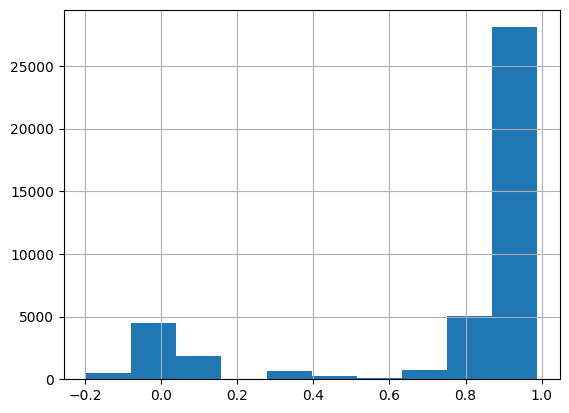

In [49]:
hist = cosine_similarity_df['Cosine_similarity'].hist()

Now I sort by decreasing semantic change score:

In [50]:
cosine_similarity_df_sorted = cosine_similarity_df.sort_values(by='Cosine_similarity', ascending=True)
cosine_similarity_df_sorted.head()

,Word,Cosine_similarity,Frequency_t1,Frequency_t2
39774,tuisen,-0.196656,2,3
26051,Thobias,-0.195099,4,6
35591,zgen,-0.191059,2,3
30133,cos,-0.181467,3,4
38066,verleckeren,-0.181455,2,3


I add the total frequency:

In [51]:
cosine_similarity_df_sorted["Total_Frequency"] = cosine_similarity_df_sorted["Frequency_t1"]+cosine_similarity_df_sorted["Frequency_t2"]
cosine_similarity_df_sorted

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency
39774,tuisen,-0.196656,2,3,5
26051,Thobias,-0.195099,4,6,10
35591,zgen,-0.191059,2,3,5
30133,cos,-0.181467,3,4,7
38066,verleckeren,-0.181455,2,3,5
...,...,...,...,...,...
31499,Balysen,0.985217,3,4,7
25406,hovelingen,0.985367,4,6,10
22558,diaconen,0.986724,4,7,11
27021,Coulichan,0.987467,3,5,8


I add a column with the category (function word, foreign word, numeral, and proper noun).

List of function words (from https://github.com/Yoast/javascript/blob/develop/packages/yoastseo/src/researches/dutch/functionWords.js)

In [52]:
function_words = [ "de", "het", "een", "der", "des", "den", "eén", "één", "twee", "drie", "vier", "vijf", "zes", "zeven", "acht", "negen", "tien", "elf", "twaalf", "dertien",
"veertien", "vijftien", "zestien", "zeventien", "achttien", "negentien", "twintig", "honderd", "honderden", "duizend", "duizenden", "miljoen",
"miljoenen", "biljoen", "biljoenen","eerste", "tweede", "derde", "vierde", "vijfde", "zesde", "zevende", "achtste", "negende",
"tiende", "elfde", "twaalfde", "dertiende", "veertiende", "vijftiende", "zestiende", "zeventiende",
"achttiende", "negentiende", "twinstigste","ik", "je", "jij", "hij", "ze", "we", "wij", "jullie", "zij", "u", "ge", "gij", "men", "mij", "jou", "hem", "haar", "hen", "hun", "uw", "dit", "dat", "deze", "die", "zelf", "mijn", "mijne", "jouw", "jouwe", "zijne", "hare", "ons", "onze", "hunne", "uwe", "elkaars", "elkanders", "alle", "sommige", "sommigen", "weinig", "weinige", "weinigen", "veel", "vele", "velen", "geen", "beetje",
"elke", "elk", "genoeg", "meer", "meest", "meeste", "meesten", "paar", "zoveel", "enkele", "enkelen", "zoveelste", "hoeveelste",
"laatste", "laatsten", "iedere", "allemaal", "zekere", "ander", "andere", "gene", "enig", "enige", "verscheidene",
"verschillende", "voldoende", "allerlei", "allerhande", "enerlei", "enerhande", "beiderlei", "beiderhande", "tweeërlei", "tweeërhande",
"drieërlei", "drieërhande", "velerlei", "velerhande", "menigerlei", "menigerhande", "enigerlei", "enigerhande", "generlei", "generhande","mezelf", "mijzelf", "jezelf", "jouzelf", "zichzelf", "haarzelf", "hemzelf", "onszelf", "julliezelf",
"henzelf", "hunzelf", "uzelf", "zich", "mekaar", "elkaar", "elkander", "mekander", "iedereen", "ieder", "eenieder", "alleman", "allen", "alles", "iemand", "niemand", "iets", "niets", "menigeen", "ieders", "aller", "iedereens", "eenieders", "welke", "welk", "wat", "wie", "wiens", "wier", "hoe", "waarom", "waar", "hoezo", "hoeveel", "daaraan", "daarachter", "daaraf", "daarbij", "daarbinnen", "daarboven", "daarbuiten", "daardoorheen",
"daarheen", "daarin", "daarjegens", "daarmede", "daarnaar", "daarnaartoe", "daaromtrent", "daaronder", "daarop", "daarover",
"daaroverheen", "daarrond", "daartegen", "daartussen", "daartussenuit", "daaruit", "daarvan", "daarvandaan", "eraan", "erachter",
"erachteraan", "eraf", "erbij", "erbinnen", "erboven", "erbuiten", "erdoor", "erdoorheen", "erheen", "erin", "erjegens", "ermede",
"ermee", "erna", "ernaar", "ernaartoe", "ernaast", "erom", "eromtrent", "eronder", "eronderdoor", "erop", "eropaf", "eropuit", "erover",
"eroverheen", "errond", "ertegen", "ertegenaan", "ertoe", "ertussen", "ertussenuit", "eruit", "ervan", "ervandaan", "ervandoor", "ervoor",
"hieraan", "hierachter", "hieraf", "hierbij", "hierbinnen", "hierboven", "hierbuiten", "hierdoor", "hierdoorheen", "hierheen", "hierin",
"hierjegens", "hierlangs", "hiermede", "hiermee", "hierna", "hiernaar", "hiernaartoe", "hiernaast", "hieromheen", "hieromtrent",
"hieronder", "hierop", "hierover", "hieroverheen", "hierrond", "hiertegen", "hiertoe", "hiertussen", "hiertussenuit", "hieruit", "hiervan",
"hiervandaan", "hiervoor", "vandaan", "waaraan", "waarachter", "waaraf", "waarbij", "waarboven", "waarbuiten", "waardoorheen",
"waarheen", "waarin", "waarjegens", "waarmede", "waarna", "waarnaar", "waarnaartoe", "waarnaast", "waarop", "waarover", "waaroverheen",
"waarrond", "waartegen", "waartegenin", "waartoe", "waartussen", "waartussenuit", "waaruit", "waarvan", "waarvandaan", "waarvoor","daar", "hier", "ginder", "daarginds", "ginds", "ver", "veraf", "ergens", "nergens", "overal", "dichtbij",
"kortbij","word", "wordt", "werd", "werden", "ben", "bent", "is", "was", "waren",  "worden", "zijn", "heb", "hebt", "heeft", "hadden", "had", "kun", "kan", "kunt", "kon", "konden", "mag",
"mocht", "mochten", "dien", "dient", "diende", "dienden", "moet", "moest", "moesten", "ga", "gaat",
"ging", "gingen","hebben", "kunnen", "mogen", "dienen", "moeten", "gaan", "blijkt", "blijk", "bleek", "bleken", "gebleken", "dunkt", "dunk", "dunkte", "dunkten",
"gedunkt", "heet", "heette", "heetten", "geheten", "lijkt", "lijk", "geleken", "leek", "leken",
"schijn", "schijnt", "scheen", "schenen", "toescheen", "toeschijnt", "toeschijn", "toeschenen","blijken", "dunken", "heten", "lijken", "schijnen", "toeschijnen", "à", "aan", "aangaande", "achter", "behalve", "behoudens", "beneden", "benevens", "benoorden", "benoordoosten", "benoordwesten",
"beoosten", "betreffende", "bewesten", "bezijden", "bezuiden", "bezuidoosten", "bezuidwesten", "bij", "binnen", "blijkens", "boven", "bovenaan",
"buiten", "circa", "conform", "contra", "cum", "dankzij", "door", "gedurende", "gezien", "in", "ingevolge", "inzake", "jegens", "krachtens",
"langs", "luidens", "met", "middels", "na", "naar", "naast", "nabij", "namens", "nevens", "niettegenstaande", "nopens", "om",
"omstreeks", "omtrent", "onder", "onderaan", "ongeacht", "onverminderd", "op", "over", "overeenkomstig", "per", "plus", "post",
"richting", "rond", "rondom", "spijts", "staande", "te", "tegen", "tegenover", "ten", "ter", "tijdens", "tot", "tussen",
"uit", "van", "vanaf", "vanuit", "versus", "via", "vis-à-vis", "volgens", "voor", "voorbij", "wegens", "zijdens",
"zonder","af", "heen", "mee", "toe", "achterop", "onderin", "voorin", "bovenop",
"buitenop", "achteraan", "onderop", "binnenin", "tevoren","en", "alsmede", "of", "ofwel", "en/of", "zowel", "evenmin", "zomin", "hetzij", "vermits", "dewijl", "dorodien", "naardien", "nademaal", "overmits", "wijl", "eer",
"eerdat", "aleer", "vooraleer", "alvorens", "totdat", "zolang", "sinds", "sedert", "ingeval", "tenware", "alhoewel",
"hoezeer", "uitgezonderd", "zoverre", "zover", "naargelang", "naarmate", "alsof", "zegt", "zei", "vraagt", "vroeg", "denkt", "dacht", "stelt", "pleit", "pleitte", "absoluut", "zeker", "ongetwijfeld", "sowieso", "onmiddelijk", "meteen", "inclusief",
"direct", "ogenblikkelijk", "terstond", "natuurlijk", "vanzelfsprekend", "gewoonlijk", "normaliter",
"doorgaans", "werkelijk", "daadwerkelijk", "inderdaad", "waarachtig", "oprecht", "bijna", "meestal", "misschien",
"waarschijnlijk", "wellicht", "mogelijk", "vermoedelijk", "allicht", "aannemelijk", "oorspronkelijk", "aanvankelijk",
"initieel", "eigenlijk", "feitelijk", "wezenlijk", "juist", "reeds", "alvast", "bijv.", "vaak", "dikwijls", "veelal",
"geregeld", "menigmaal", "regelmatig", "veelvuldig", "eenvoudigweg", "simpelweg", "louter", "kortweg", "stomweg", "domweg", "zomaar",
"eventueel", "mogelijkerwijs", "eens", "weleens", "nooit", "ooit", "anders", "momenteel", "thans", "incidenteel", "trouwens", "elders",
"volgend", "recent", "onlangs", "recentelijk", "laatst", "zojuist", "relatief", "duidelijk", "overduidelijk", "klaarblijkelijk",
"nadrukkelijk", "ogenschijnlijk", "kennelijk", "schijnbaar", "alweer", "continu", "herhaaldelijk", "nog", "steeds", "nu","zeer", "erg", "redelijk", "flink", "tikkeltje", "bijzonder", "ernstig", "enigszins",
"zo", "tamelijk", "nogal", "behoorlijk", "zwaar", "heel", "hele", "reuze", "buitengewoon",
"ontzettend", "vreselijk","laat", "liet", "lieten", "kom", "komt", "kwam", "kwamen", "maakt",
"maak", "maakte", "maakten", "doe", "doet", "deed", "deden", "vindt", "vind", "vond", "vonden", "laten", "komen", "maken", "doen", "vinden", "nieuw", "nieuwe", "nieuwer", "nieuwere", "nieuwst", "nieuwste", "oud", "oude", "ouder", "oudere",
"oudst", "oudste", "vorig", "vorige", "goed", "goede", "beter", "betere", "best", "beste", "groot", "grote", "groter", "grotere",
"grootst", "grootste", "makkelijk", "makkelijke", "makkelijker", "makkelijkere", "makkelijkst", "makkelijste", "gemakkelijk",
"gemakkelijke", "gemakkelijker", "gemakkelijkere", "gemakkelijkst", "gemakkelijste", "simpel", "simpele", "simpeler", "simpelere",
"simpelst", "simpelste", "snel", "snelle", "sneller", "snellere", "snelst", "snelste", "verre", "verder", "verdere", "verst",
"verste", "lang", "lange", "langer", "langere", "langst", "langste", "hard", "harde", "harder", "hardere", "hardst", "hardste",
"minder", "mindere", "minst", "minste", "eigen", "laag", "lage", "lager", "lagere", "laagst", "laagste", "hoog", "hoge", "hoger",
"hogere", "hoogst", "hoogste", "klein", "kleine", "kleiner", "kleinere", "kleinst", "kleinste", "kort", "korte", "korter", "kortere",
"kortst", "kortste", "herhaaldelijke", "directe", "ongeveer", "slecht", "slechte", "slechter", "slechtere", "slechtst",
"slechtste", "zulke", "zulk", "zo'n", "zulks", "er", "extreem", "extreme", "bijbehorende", "bijbehorend", "niet","oh", "wauw", "hèhè", "hè", "hé", "au", "ai", "jaja", "welja", "jawel", "ssst", "heremijntijd", "hemeltjelief", "aha",
"foei", "hmm", "nou", "nee", "tja", "nja", "okido", "ho", "halt", "komaan", "komop", "verrek", "nietwaar", "brr", "oef",
"ach", "och", "bah", "enfin", "afijn", "haha", "hihi", "hatsjie", "hatsjoe", "hm", "tring", "vroem", "boem", "hopla", "ml", "cl", "dl", "l", "tl", "el", "mg", "g", "gr", "kg", "ca", "theel", "min", "sec", "uur", "seconde", "secondes", "seconden", "minuut", "minuten", "uur", "uren", "dag", "dagen", "week", "weken",
"maand", "maanden", "jaar", "jaren", "vandaag", "morgen", "overmorgen", "gisteren", "eergisteren",
"'s", "morgens", "avonds", "middags", "nachts","ding", "dingen", "manier", "manieren", "item", "items", "keer", "maal", "procent", "geval", "aspect", "persoon",
"personen", "deel","wel", "ja", "neen", "oké", "oke", "okee", "ok", "zoiets", "€", "euro","mevr", "dhr", "mr", "dr", "prof", "jr", "sr", "aangezien", "al", "aldus", "allereerst", "als", "alsook", "anderzijds", "bijgevolg", "bijvoorbeeld", "bovendien",
"concluderend",	"daardoor", "daarentegen", "daarmee", "daarna", "daarnaast", "daarom", "daartoe", "daarvoor", "dadelijk", "dan",
"desondanks", "dienovereenkomstig", "dientegevolge", "doch", "doordat", "dus", "echter", "eerst", "evenals", "eveneens", "evenzeer",
"hierom", "hoewel", "immers", "indien", "integendeel", "intussen", "kortom", "later", "maar", "mits", "nadat", "namelijk", "net als",
"niettemin", "noch", "ofschoon", "omdat", "ondanks", "ondertussen", "ook", "opdat", "resumerend", "samengevat", "samenvattend",
"tegenwoordig", "teneinde", "tenzij", "terwijl", "tevens", "toch", "toen", "uiteindelijk", "vanwege", "vervolgens", "voorafgaand",
"vooralsnog", "voordat", "voorts", "vroeger", "waardoor", "waarmee", "waaronder", "wanneer", "want", "zoals", "zodat", "zodoende",
"zodra"]

In [53]:
# create a list of our conditions
conditions = [
    (cosine_similarity_df_sorted['Word'].isin(function_words)), # function words
    ((cosine_similarity_df_sorted.Word.str.isdigit()) | (cosine_similarity_df_sorted['Word'].str.match('^\d*?1st$')) | (cosine_similarity_df_sorted['Word'].str.match('^\d*?2nd$')) | (cosine_similarity_df_sorted['Word'].str.match('^\d*?3rd$')) | (cosine_similarity_df_sorted['Word'].str.match('^\d*[^123]th$'))), # numbers
    (cosine_similarity_df_sorted['Word'].apply(lambda x: x[0].isupper() and x[1:len(x)].islower())), # proper nouns
    ]

# create a list of the values we want to assign for each condition
values = ['Function word','Numeral', 'Proper noun']

# create a new column and use np.select to assign values to it using our lists as arguments
cosine_similarity_df_sorted['Category_automatic'] = np.select(conditions, values, default = "")
cosine_similarity_df_sorted = cosine_similarity_df_sorted.sort_values(by="Cosine_similarity", ascending=False)

The top most changed words:

In [54]:
cosine_similarity_df_sorted.head(100)

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
26623,konincklijcke,0.987831,3,5,8,
27021,Coulichan,0.987467,3,5,8,Proper noun
22558,diaconen,0.986724,4,7,11,
25406,hovelingen,0.985367,4,6,10,
31499,Balysen,0.985217,3,4,7,Proper noun
...,...,...,...,...,...,...
16706,vet,0.979173,6,11,17,
33796,ontrouwheyt,0.979163,2,4,6,
31434,afwe,0.979128,3,4,7,
13810,bevoegdheid,0.979126,8,14,22,


In [127]:
cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'] =="mogol"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
9995,mogol,-0.008839,13,22,35,


In [128]:
cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'] =="tartar"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic


In [129]:
cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'] =="kling"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
26006,kling,0.88433,4,6,10,


In [130]:
cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'] =="inlander"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
437,inlander,0.863874,467,931,1398,


In [131]:
cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'] =="burger"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
846,burger,0.753595,244,463,707,


In [55]:
cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'] =="moor"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
2632,moor,0.806698,68,125,193,


In [56]:
cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'] =="mardijker"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
3427,mardijker,0.859384,49,89,138,


In [57]:
cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'] =="mahratten"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
25383,mahratten,0.962637,4,6,10,


I plot the terms by their total frequency and semantic change score:

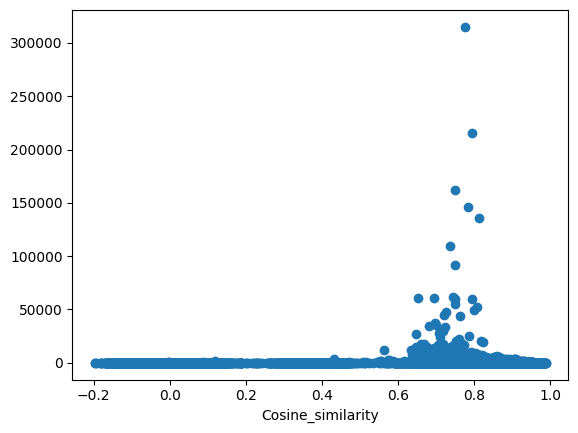

In [58]:
ax = cosine_similarity_df_sorted.set_index('Cosine_similarity')['Total_Frequency'].plot(style='o')

Which words are the outliers? 

In [59]:
cosine_similarity_df_sorted.loc[cosine_similarity_df_sorted['Total_Frequency'] > 10000].Word.tolist()

['»',
 '«',
 'zijn',
 'den',
 'die',
 'van',
 'hebben',
 'brief',
 'er',
 'te',
 'de',
 'moeten',
 'zullen',
 'niet',
 'naar',
 'schip',
 'kunnen',
 'sijn',
 'veel',
 'hij',
 'en',
 'geen',
 'het',
 'met',
 'dat',
 '\n',
 'uit',
 'ons',
 'in',
 'Batavia',
 'haar',
 'worden',
 'om',
 'ander',
 'voor',
 'als',
 'ƒ',
 'wij',
 'dan',
 '’t',
 'men',
 'na',
 'tot',
 'aan',
 'maar',
 'een',
 'door',
 'nog',
 'wel',
 'al',
 'over',
 'doen',
 'd',
 'ook',
 'op',
 'bij',
 'goed',
 'of',
 'uyt',
 'komen',
 'onder']

I exclude the outliers:

In [60]:
cosine_similarity_df_sorted_nooutliers = cosine_similarity_df_sorted.loc[cosine_similarity_df_sorted['Total_Frequency'] < 10000]
cosine_similarity_df_sorted_nooutliers.shape

(41757, 6)

Plot:

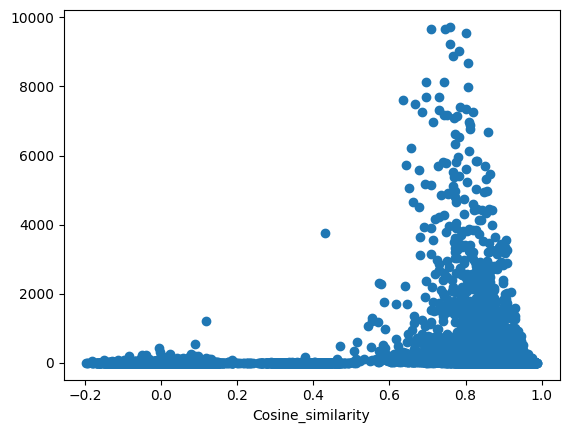

In [61]:
ax = cosine_similarity_df_sorted_nooutliers.set_index('Cosine_similarity')['Total_Frequency'].plot(style='o')

What is the semantic change of the words we have chosen?

In [62]:
words_chosen = ["moor","moslim","mahratten","inlander","burger", "blanke","mixties","swarte","mardijker"]

In [63]:
cosine_similarity_chosen = cosine_similarity_df_sorted[cosine_similarity_df_sorted['Word'].isin(words_chosen)]
cosine_similarity_chosen

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
25383,mahratten,0.962637,4,6,10,
20612,mixties,0.934223,5,8,13,
25117,blanke,0.928393,4,6,10,
8211,moslim,0.914646,17,29,46,
437,inlander,0.863874,467,931,1398,
3427,mardijker,0.859384,49,89,138,
2566,swarte,0.814944,70,129,199,
2632,moor,0.806698,68,125,193,
846,burger,0.753595,244,463,707,


In [64]:
min(cosine_similarity_chosen.Cosine_similarity)

0.7535945773124695

In [65]:
min(cosine_similarity_chosen.Total_Frequency)

10

In [66]:
min(cosine_similarity_df_sorted.Cosine_similarity)

-0.19665589928627014

Now I focus on those words that have a frequency higher than min(semantic_change_chosen.Total_Frequency). How many are there?

In [67]:
cosine_similarity_df_sorted_filtered = cosine_similarity_df_sorted_nooutliers.loc[(cosine_similarity_df_sorted_nooutliers['Total_Frequency'] >= min(cosine_similarity_chosen.Total_Frequency))]
cosine_similarity_df_sorted_filtered.shape

(26089, 6)

Which words are these words?

In [68]:
cosine_similarity_df_sorted_filtered

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
22558,diaconen,0.986724,4,7,11,
25406,hovelingen,0.985367,4,6,10,
21934,soute,0.985064,4,7,11,
15643,gedivulgeren,0.983661,7,12,19,
18581,wrevelig,0.983565,6,9,15,
...,...,...,...,...,...,...
21624,scheepstimmerman,-0.163905,5,7,12,
24028,geharpt,-0.168049,4,6,10,
25982,sorteer,-0.179682,4,6,10,
7265,1626,-0.181042,20,34,54,Numeral


I create a list for these words:

In [69]:
highfreq_words = cosine_similarity_df_sorted_filtered.Word.tolist()
highfreq_words[:10]

['diaconen',
 'hovelingen',
 'soute',
 'gedivulgeren',
 'wrevelig',
 'inwoonderen',
 'beleefdelijck',
 'ravage',
 'Celebees',
 'overgeblef']

Now I annotate the plot with these:

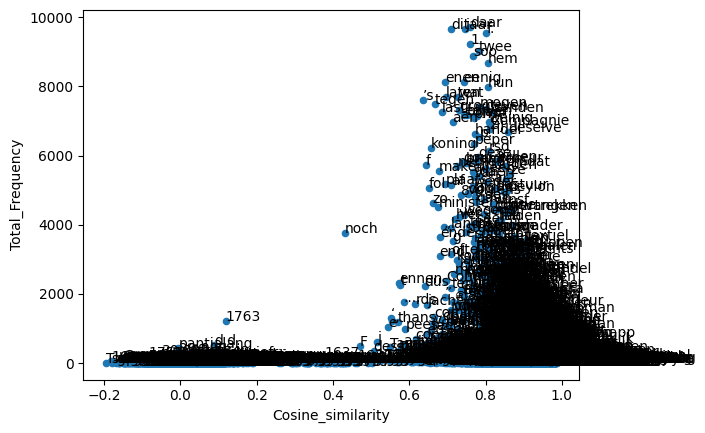

In [70]:
import matplotlib.pyplot as plt  # Import pyplot for plotting

cosine_similarity_df_sorted_filtered_p = cosine_similarity_df_sorted_filtered[['Word','Cosine_similarity', 'Total_Frequency']]
fig, ax = plt.subplots()
cosine_similarity_df_sorted_filtered_p.plot('Cosine_similarity', 'Total_Frequency', kind='scatter', ax=ax)
for k, v in cosine_similarity_df_sorted_filtered_p.iterrows():
  word = v['Word']
  sc = v['Cosine_similarity']
  f = v['Total_Frequency']
  #print("w", v['Word'])
  #print("sc:", str(sc))
  #print("f:", str(f))
  ax.annotate(word, xy=(sc,f))

What are the neighbours of these words in the two spaces?

In [71]:
count = 0
for word in highfreq_words:
  count += 1
  if count < 10:
    print(word)
    print("Neighbours in first space:")
    print(model1.wv.similar_by_word(word, 10))
    print("Neighbours in second space:")
    print(model2.wv.similar_by_word(word, 10))

diaconen
Neighbours in first space:
[('tirannique', 0.9882006645202637), ('deese', 0.9881911277770996), ('voerder', 0.9877613186836243), ('Combuys', 0.98762446641922), ('rep', 0.9874768853187561), ('gemengt', 0.9871569275856018), ('bruydegom', 0.9871553778648376), ('concipieren', 0.9871533513069153), ('ongeregeltheyt', 0.9869014024734497), ('familje', 0.9868291616439819)]
Neighbours in second space:
[('figuurlijk', 0.9880148768424988), ('incarceratie', 0.9862117767333984), ('behoudennen', 0.9859243631362915), ('aanranden', 0.9858720302581787), ('beslegten', 0.9858577847480774), ('bedroven', 0.9858128428459167), ('compassie', 0.9858083128929138), ('houtwerek', 0.9857485890388489), ('bevegten', 0.985683262348175), ('doceeren', 0.9856560826301575)]
hovelingen
Neighbours in first space:
[('hooftofficieren', 0.9897509813308716), ('gemengt', 0.9862751364707947), ('geëxpireren', 0.9861959218978882), ('uytgedient', 0.9860823154449463), ('remis', 0.9860705733299255), ('jeg', 0.9852995276451111)

What are the neighbours of our chosen words in the two spaces?

In [126]:
words_chosen = ["moor", "moslim", "mahratten", "inlander", "burger", "blanke", "mixties", "swarte", "mardijker"]

for count, word in enumerate(words_chosen, start=1):
    if count <= 10:  # Ensures no more than 10 words are processed
        print(f"Word {count}: {word}")
        print("Neighbours in first space:")
        if word in model1.wv:
            print(model1.wv.similar_by_word(word, topn=10))
        else:
            print(f"{word} not in the first model's vocabulary.")
        
        print("Neighbours in second space:")
        if word in model2.wv:
            print(model2.wv.similar_by_word(word, topn=10))
        else:
            print(f"{word} not in the second model's vocabulary.")
        
        print("-" * 40)  # Separator for readability

Word 1: moor
Neighbours in first space:
[('Golcondasen', 0.9583379626274109), ('Johorsen', 0.9517016410827637), ('Moorschen', 0.9508176445960999), ('huysvrouw', 0.9504451751708984), ('tommagon', 0.9491580724716187), ('Jongen', 0.948074460029602), ('expressen', 0.9471094608306885), ('sabandaar', 0.945722222328186), ('Gammalamma', 0.9449086785316467), ('Asem', 0.944146990776062)]
Neighbours in second space:
[('toebehooren', 0.9219683408737183), ('toebehoren', 0.914232611656189), ('coopluyd', 0.9067153930664062), ('Fransch', 0.9058419466018677), ('Portugesen', 0.9052025079727173), ('Maleyer', 0.9035160541534424), ('Malaxe', 0.9025989770889282), ('Fransz', 0.9022771120071411), ('Engelsch', 0.9017452001571655), ('vlagge', 0.9013543725013733)]
----------------------------------------
Word 2: moslim
Neighbours in first space:
[('Maturese', 0.9816362857818604), ('ontf', 0.9806625843048096), ('737', 0.9804486036300659), ('verken', 0.9799560308456421), ('gefourneren', 0.9796789288520813), ('swa'

## V. Semantic change detection using neighbours

Print the histogram of the frequency of the words in the corpus

                Freq
count  230777.000000
mean       25.613315
std      1108.699146
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max    315112.000000


array([[<Axes: title={'center': 'Freq'}>]], dtype=object)

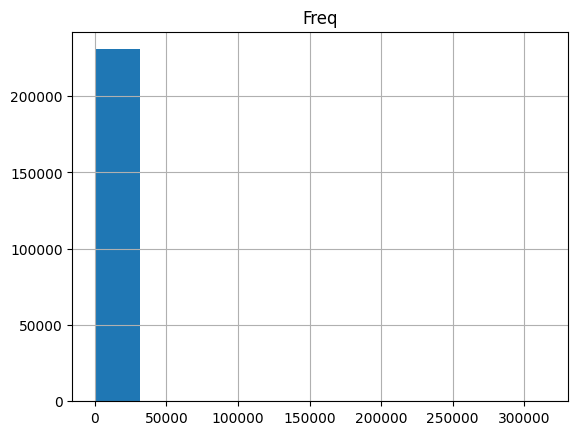

In [73]:
model = sg_w5_f1_300
vocab = model.wv.index_to_key
frequencies = list()
for w in vocab:
  frequencies.append(model.wv.get_vecattr(w, "count"))
print(pd.DataFrame({'Word':vocab,'Freq':frequencies}).describe())
pd.DataFrame({'Word':vocab,'Freq':frequencies}).hist()

I exclude all words with frequency lower than min_freq and higher than max_freq:

In [74]:
def filter_words(model, min_freq, max_freq):
  vocab = model.wv.index_to_key
  vocab_filtered = []
  for w in vocab:
    if model.wv.get_vecattr(w, "count") <max_freq and model.wv.get_vecattr(w, "count")>min_freq:
      vocab_filtered.append(w)
  return vocab_filtered

vocab1_filtered = filter_words(model1,2,50000)
vocab2_filtered = filter_words(model2,2,50000)
vocab_filtered = list(set(vocab1_filtered) & set(vocab2_filtered))

How many words?

In [75]:
print(str(len(vocab_filtered)))

33273


Distribution of filtered word frequencies:

               Freq
count  50996.000000
mean      92.218703
std     1187.850437
min        4.000000
25%        5.000000
50%       10.000000
75%       26.000000
max    96183.000000


array([[<Axes: title={'center': 'Freq'}>]], dtype=object)

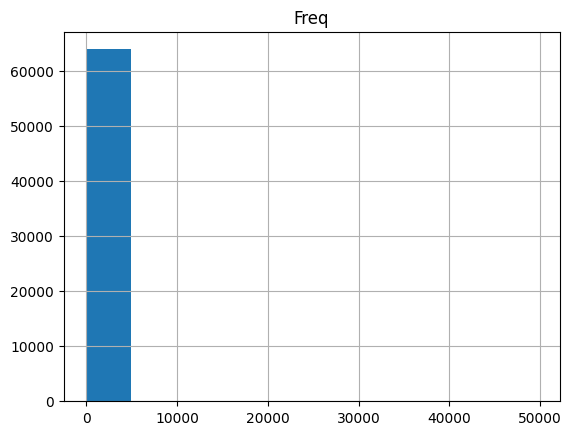

In [76]:
word2freq = pd.DataFrame({'Word':vocab,'Freq':frequencies})
print(word2freq[(word2freq.Freq<100000) & (word2freq.Freq>3)].describe())
word2freq[(word2freq.Freq<50000) & (word2freq.Freq>2)].hist()

I extract the top_n neighbours and save them in a dictionary mapping a word to the list of its 100 neighbours:

In [77]:
def extract_neighbours(w2vmodel, vocab_list, top_n):
  count = 0
  word2neighbours = dict()
  for w in vocab_list:
    count += 1
    #if (count % 100) == 0:
    #  print(str(count), "out of", str(len(vocab_list)), w)
    neighbours = w2vmodel.wv.similar_by_word(w, top_n)
    #print(str(neighbours))
    neighbour_list = list()
    for n in neighbours:
      neighbour_list.append(n[0])
    word2neighbours[w] = neighbour_list
  return word2neighbours

I apply this to model1 and model2 for filtered words:

In [78]:
#word2neighbours1 = extract_neighbours(model1, model1.wv.index_to_key)
word2neighbours1 = extract_neighbours(model1, vocab1_filtered, 100)
#word2neighbours2 = extract_neighbours(model2, model2.wv.index_to_key)
word2neighbours2 = extract_neighbours(model2, vocab2_filtered, 100)

For every word in the intersection between the two vocabularies, compare its neighbours in t1 and its neighbours in t2; the semantic change score is the number of shared neighbours between the two divided by 100. NB This is different from the formula in Gonen et al. (2020), who take the negative of the overlap.

In [79]:
#vocab_12 = list(set(model1.wv.index_to_key) & set(model2.wv.index_to_key))
w2sc = dict()
for w in vocab_filtered:
  sc = len(list(set(word2neighbours1[w]) & set(word2neighbours2[w])))/100
  w2sc[w] = sc

I have saved these scores in the w2sc dictionary. Now I sort it by decreasing score to see which words changed the most:

In [80]:
w2sc_sorted = sorted(w2sc.items(), key=lambda kv: kv[1], reverse=False)
w2sc_sorted[:10]

[('gesententieren', 0.0),
 ('getergen', 0.0),
 ('vredenstractaet', 0.0),
 ('Amedabaat', 0.0),
 ('Fernando', 0.0),
 ('hoofdstad', 0.0),
 ('schijnwinst', 0.0),
 ('raadsheer', 0.0),
 ('houtzagerij', 0.0),
 ('beroofen', 0.0)]

What are the most changed words?

In [81]:
top_changed = [i[0] for i in w2sc_sorted][:20]
top_changed

['gesententieren',
 'getergen',
 'vredenstractaet',
 'Amedabaat',
 'Fernando',
 'hoofdstad',
 'schijnwinst',
 'raadsheer',
 'houtzagerij',
 'beroofen',
 'saten',
 '1509',
 'Brittange',
 'uytgegaan',
 'Limbots',
 'dierbaren',
 'vertog',
 'Advijsen',
 'principe',
 '8604']

What are their neighbours?

In [82]:
for w in top_changed:
  print(w)
  print(str(word2neighbours1[w]))
  print(str(word2neighbours2[w]))

gesententieren
['confirmeerden', 'concipieren', 'Combuys', 'afsteken', 'geschieten', 'gespolieren', 'indirecet', 'massa', 'bruydegom', 'uytgegijven', 'deese', 'moed', 'geheym', 'Lij', 'pinasse', 'opontbooen', 'afsen', 'continueerenen', 'clercquen', 'waeromtrent', 'retorsie', 'Johoors', 'inwoonderen', 'binnenst', 'familje', 'snoden', 'materiën', 'uitbergen', 'attestatiën', 'ontbood', 'forme', 'stilten', 'droogten', 'Gerestitueert', 'uytgesinden', 'doleerden', 'verklaringen', 'beneerstigen', 'gereguleernen', 'thuysgesonden', 'spie', 'gequiteeren', 'schoepen', 'gereclameren', 'sinister', 'naloopen', 'middelerwijl', 'voortseylen', 'requesen', 'haarzelven', 'vergift', 'suffisante', 'voorge-', 'logiemenen', 'versonden', 'vlaggen', 'gesalveerde', 'ontbaao', 'stevenen', 'Loloda', 'processe', 'schep', 'Commorin', 'aengedrongen', 'sage', 'vassal', 'Wannij', 'desidereren', 'fameuse', 'precautie', 'Heyligen', 'Geleent', 'excuseerd', 'aengevallen', 'Cay', 'vlugtelingen', 'versondene', 'coninklijk',

In [83]:
neighbours_df = pd.DataFrame(([w, w2sc[w], model1.wv.get_vecattr(w, "count") , model2.wv.get_vecattr(w, "count") ] for w in vocab_filtered), columns = ('Word', 'Neighbour_score', "Frequency_t1", "Frequency_t2"))
neighbours_df.describe()

,Neighbour_score,Frequency_t1,Frequency_t2
count,33273.000000,33273.000000,33273.000000
mean,0.022793,47.665254,86.750909
std,0.054966,437.199142,842.080808
min,0.000000,3.000000,4.000000
25%,0.000000,4.000000,6.000000
50%,0.010000,7.000000,11.000000
75%,0.020000,16.000000,28.000000
max,0.750000,20513.000000,41536.000000


Visualise the distribution of the semantic change scores with a histogram:

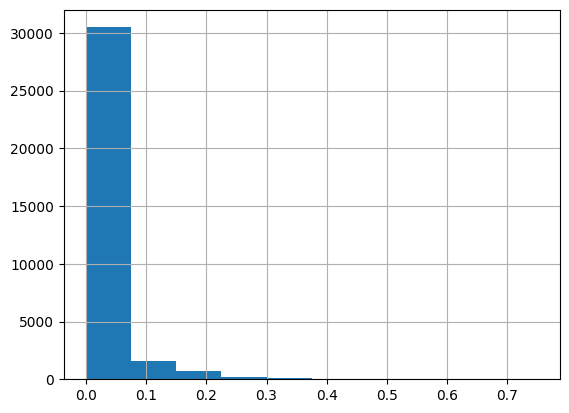

In [84]:
hist = neighbours_df['Neighbour_score'].hist()

Now I sort by increasing neighbour score:

In [85]:
neighbours_df_sorted = neighbours_df.sort_values(by='Neighbour_score', ascending=True)
neighbours_df_sorted.head(50)

,Word,Neighbour_score,Frequency_t1,Frequency_t2
0,gesententieren,0.0,4,6
18315,geremedieren,0.0,5,7
18314,Grogol,0.0,3,4
18307,Zuidooster-,0.0,10,17
18305,Hopman,0.0,3,4
18304,politiquen,0.0,3,5
18303,stilgehouden,0.0,3,5
18302,diminueren,0.0,5,7
18299,Euro-,0.0,3,4
18298,Sabander,0.0,5,9


Now I sort by descending neighbour score:

In [109]:
neighbours_df_sorted = neighbours_df.sort_values(by='Neighbour_score', ascending=False)
neighbours_df_sorted.head(50)

,Word,Neighbour_score,Frequency_t1,Frequency_t2
12798,37,0.75,82,148
20882,33,0.75,106,190
29449,55,0.71,79,143
30686,10,0.70,1194,2163
30959,44,0.70,74,136
6529,34,0.69,84,151
5994,47,0.68,46,83
14816,45,0.67,122,221
8200,5,0.67,1486,2516
7671,7,0.67,999,1761


I add the total frequency:

In [86]:
neighbours_df_sorted["Total_Frequency"] = neighbours_df_sorted["Frequency_t1"]+neighbours_df_sorted["Frequency_t2"]
neighbours_df_sorted

,Word,Neighbour_score,Frequency_t1,Frequency_t2,Total_Frequency
0,gesententieren,0.00,4,6,10
18315,geremedieren,0.00,5,7,12
18314,Grogol,0.00,3,4,7
18307,Zuidooster-,0.00,10,17,27
18305,Hopman,0.00,3,4,7
...,...,...,...,...,...
30686,10,0.70,1194,2163,3357
30959,44,0.70,74,136,210
29449,55,0.71,79,143,222
20882,33,0.75,106,190,296


I add a column with the category (function word, foreign word, numeral, and proper noun).

In [88]:
# create a list of our conditions
conditions = [
    (neighbours_df_sorted['Word'].isin(function_words)), # function words
    ((neighbours_df_sorted.Word.str.isdigit()) | (neighbours_df_sorted['Word'].str.match('^\d*?1st$')) | (neighbours_df_sorted['Word'].str.match('^\d*?2nd$')) | (neighbours_df_sorted['Word'].str.match('^\d*?3rd$')) | (neighbours_df_sorted['Word'].str.match('^\d*[^123]th$'))), # numbers
    (neighbours_df_sorted['Word'].apply(lambda x: x[0].isupper() and x[1:len(x)].islower())), # proper nouns
    ]

# create a list of the values we want to assign for each condition
values = ['Function word','Numeral', 'Proper noun']

# create a new column and use np.select to assign values to it using our lists as arguments
neighbours_df_sorted['Category_automatic'] = np.select(conditions, values, default = "")
neighbours_df_sorted

,Word,Neighbour_score,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
0,gesententieren,0.00,4,6,10,
18315,geremedieren,0.00,5,7,12,
18314,Grogol,0.00,3,4,7,Proper noun
18307,Zuidooster-,0.00,10,17,27,Proper noun
18305,Hopman,0.00,3,4,7,Proper noun
...,...,...,...,...,...,...
30686,10,0.70,1194,2163,3357,Numeral
30959,44,0.70,74,136,210,Numeral
29449,55,0.71,79,143,222,Numeral
20882,33,0.75,106,190,296,Numeral


## VI. Comparison of the two methods for semantic change detection

In [89]:
neighbours_df_sorted.sort_values(by='Word', ascending=True)

,Word,Neighbour_score,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
16825,\n,0.07,20513,41536,62049,
18124,'S,0.00,4,6,10,
16445,'t,0.00,9,15,24,
16041,(=,0.09,18,31,49,
3096,):,0.01,3,4,7,
...,...,...,...,...,...,...
26750,„,0.11,1468,2469,3937,
29655,•,0.01,11,18,29,
24686,™,0.02,4,6,10,
32589,■,0.02,11,18,29,


In [90]:
cosine_similarity_df_sorted.sort_values(by='Word', ascending=True)

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic
7,\n,0.743480,20513,41536,62049,
26013,'S,0.959993,4,6,10,
13385,'t,0.930342,9,15,24,
7711,(=,0.899705,18,31,49,
32844,):,0.933903,3,4,7,
...,...,...,...,...,...,...
144,„,0.690406,1468,2469,3937,
11502,•,0.858212,11,18,29,
24519,™,0.934527,4,6,10,
11535,■,0.887688,11,18,29,


I integrate the neighbour score in the file:

In [91]:
semantic_change_2methods = cosine_similarity_df_sorted.merge(neighbours_df_sorted, how = 'inner')
semantic_change_2methods

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
0,konincklijcke,0.987831,3,5,8,,0.00
1,Coulichan,0.987467,3,5,8,Proper noun,0.01
2,diaconen,0.986724,4,7,11,,0.00
3,hovelingen,0.985367,4,6,10,,0.01
4,Balysen,0.985217,3,4,7,Proper noun,0.00
...,...,...,...,...,...,...,...
33268,geharpt,-0.168049,4,6,10,,0.01
33269,sorteer,-0.179682,4,6,10,,0.00
33270,1626,-0.181042,20,34,54,Numeral,0.01
33271,cos,-0.181467,3,4,7,,0.00


In [92]:
semantic_change_2methods_all = cosine_similarity_df_sorted.merge(neighbours_df_sorted, how = 'outer')
semantic_change_2methods_all

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
0,konincklijcke,0.987831,3,5,8,,0.00
1,Coulichan,0.987467,3,5,8,Proper noun,0.01
2,diaconen,0.986724,4,7,11,,0.00
3,hovelingen,0.985367,4,6,10,,0.01
4,Balysen,0.985217,3,4,7,Proper noun,0.00
...,...,...,...,...,...,...,...
41813,verleckeren,-0.181455,2,3,5,,NaN
41814,cos,-0.181467,3,4,7,,0.00
41815,zgen,-0.191059,2,3,5,,NaN
41816,Thobias,-0.195099,4,6,10,Proper noun,0.01


In [94]:
semantic_change_2methods_all[semantic_change_2methods_all['Word'] =="mahratten"]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
3768,mahratten,0.962637,4,6,10,,0.0


I plot the terms by two semantic change scores:

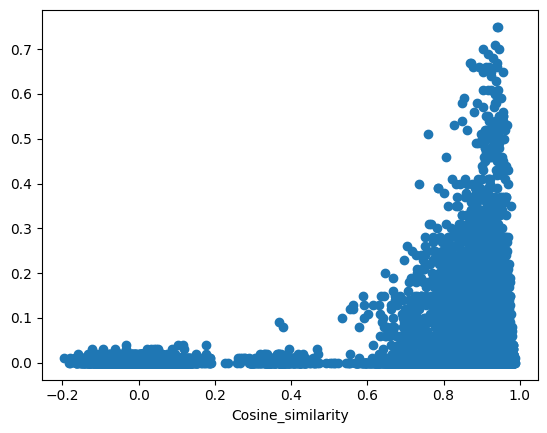

In [95]:
ax = semantic_change_2methods.set_index('Cosine_similarity')['Neighbour_score'].plot(style='o')

There seems to be a positive correlation: the higher the cosine similarity the higher the neighbour similarity.

In [97]:
semantic_change_2methods_all.describe()

,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Neighbour_score
count,41818.000000,41818.000000,41818.000000,41818.000000,33273.000000
mean,0.750314,46.859008,89.263284,136.122292,0.022793
std,0.345484,802.320254,1817.696583,2616.266499,0.054966
min,-0.196656,2.000000,3.000000,5.000000,0.000000
25%,0.820991,3.000000,4.000000,7.000000,0.000000
50%,0.915108,5.000000,8.000000,13.000000,0.010000
75%,0.947261,12.000000,21.000000,33.000000,0.020000
max,0.987831,88608.000000,226504.000000,315112.000000,0.750000


Scores for chosen words:

In [98]:
semantic_change_2methods_all[semantic_change_2methods_all['Word'].isin(words_chosen)].describe()

,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Neighbour_score
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.870933,103.111111,198.444444,301.555556,0.035556
std,0.069678,155.807930,309.812892,465.592394,0.055478
min,0.753595,4.000000,6.000000,10.000000,0.000000
25%,0.814944,5.000000,8.000000,13.000000,0.000000
50%,0.863874,49.000000,89.000000,138.000000,0.010000
75%,0.928393,70.000000,129.000000,199.000000,0.050000
max,0.962637,467.000000,931.000000,1398.000000,0.170000


Scores for not chosen words:

In [99]:
semantic_change_2methods_all[~semantic_change_2methods_all['Word'].isin(words_chosen)].describe()

,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Neighbour_score
count,41809.000000,41809.000000,41809.000000,41809.000000,33264.000000
mean,0.750288,46.846899,89.239781,136.086680,0.022790
std,0.345515,802.403288,1817.886463,2616.539033,0.054966
min,-0.196656,2.000000,3.000000,5.000000,0.000000
25%,0.820993,3.000000,4.000000,7.000000,0.000000
50%,0.915111,5.000000,8.000000,13.000000,0.010000
75%,0.947265,12.000000,21.000000,33.000000,0.020000
max,0.987831,88608.000000,226504.000000,315112.000000,0.750000


I define a list of words that I expect did not change:

In [101]:
not_changed = ['de', 'het', 'ik', 'den']

Then I look at their scores:

In [102]:
semantic_change_2methods_all[semantic_change_2methods_all['Word'].isin(not_changed)]

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
29994,ik,0.847067,77,140,217,Function word,0.18
31915,den,0.806435,18566,34048,52614,Function word,0.22
32735,de,0.774843,88608,226504,315112,Function word,NaN
33164,het,0.748912,31587,60106,91693,Function word,NaN


In [103]:
semantic_change_2methods_all[semantic_change_2methods_all['Word'].isin(not_changed)].describe()

,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Neighbour_score
count,4.000000,4.000000,4.00000,4.00000,2.000000
mean,0.794314,34709.500000,80199.50000,114909.00000,0.200000
std,0.042310,38187.349376,100578.72531,138630.37877,0.028284
min,0.748912,77.000000,140.00000,217.00000,0.180000
25%,0.768360,13943.750000,25571.00000,39514.75000,0.190000
50%,0.790639,25076.500000,47077.00000,72153.50000,0.200000
75%,0.816593,45842.250000,101705.50000,147547.75000,0.210000
max,0.847067,88608.000000,226504.00000,315112.00000,0.220000


In [104]:
semantic_change_2methods_all[semantic_change_2methods_all['Word'].isin(words_chosen)].describe()

,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Neighbour_score
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.870933,103.111111,198.444444,301.555556,0.035556
std,0.069678,155.807930,309.812892,465.592394,0.055478
min,0.753595,4.000000,6.000000,10.000000,0.000000
25%,0.814944,5.000000,8.000000,13.000000,0.000000
50%,0.863874,49.000000,89.000000,138.000000,0.010000
75%,0.928393,70.000000,129.000000,199.000000,0.050000
max,0.962637,467.000000,931.000000,1398.000000,0.170000


Let's look at different words

In [105]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='mogol']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
39043,mogol,-0.008839,13,22,35,,0.0


In [107]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='inlander']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
28657,inlander,0.863874,467,931,1398,,0.05


In [110]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='burger']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
33094,burger,0.753595,244,463,707,,0.06


In [111]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='moor']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
31907,moor,0.806698,68,125,193,,0.01


In [112]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='kling']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
26384,kling,0.88433,4,6,10,,0.0


In [113]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='mahratten']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
3768,mahratten,0.962637,4,6,10,,0.0


In [114]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='moslim']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
21008,moslim,0.914646,17,29,46,,0.0


In [115]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='mardijker']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
29028,mardijker,0.859384,49,89,138,,0.03


In [116]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='mixties']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
15399,mixties,0.934223,5,8,13,,0.0


In [120]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='christen']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
33129,christen,0.751496,33,58,91,,0.0


In [121]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='maleis']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
23987,maleis,0.900169,55,99,154,,0.19


In [122]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='minangkabau']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score


In [123]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='inboorling']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
15063,inboorling,0.935176,8,13,21,,0.0


In [125]:
semantic_change_2methods_all[semantic_change_2methods_all['Word']=='swart']

,Word,Cosine_similarity,Frequency_t1,Frequency_t2,Total_Frequency,Category_automatic,Neighbour_score
16570,swart,0.930681,43,76,119,,0.08
